In [2]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import random
from tqdm.notebook import tqdm
import glob
import Ex2
import importlib
importlib.reload(Ex2)
from PIL import Image


In [3]:
data = pd.read_csv("Files/simplemaps_worldcities_basicv1.74/worldcities.csv")

In [23]:
data

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
40996,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
40997,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
40998,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
40999,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [24]:
df_5 = Ex2.kmeans(data,5)
df_7 = Ex2.kmeans(data,7)
df_15 = Ex2.kmeans(data,15)

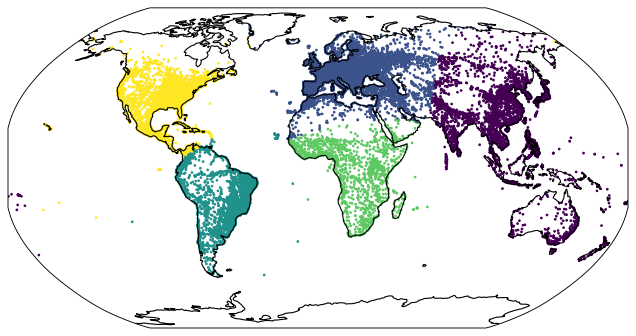

In [29]:
Ex2.plot_figure(df_5)

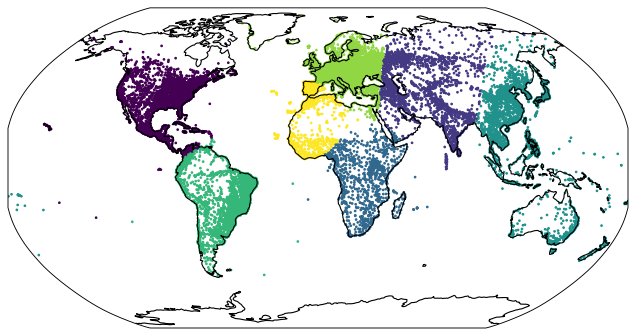

In [30]:
Ex2.plot_figure(df_7)

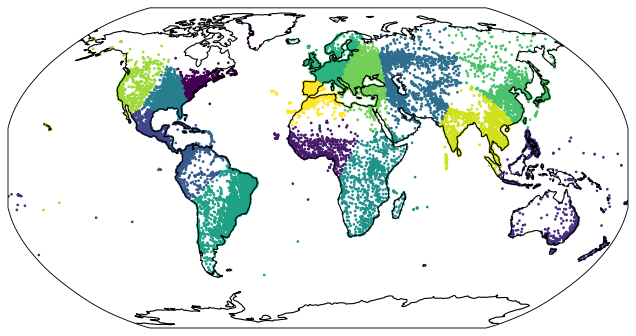

In [31]:
Ex2.plot_figure(df_15)

In [4]:
## Lets run multiple times and store the images
for i in tqdm(range(5)):
    df_5 = Ex2.kmeans_parallel(data,5)
    df_7 = Ex2.kmeans_parallel(data,7)
    df_15 = Ex2.kmeans_parallel(data,15)
    str_5 = "5_"+str(i)
    str_7 = "7_"+str(i)
    str_15 = "15_"+str(i)
    Ex2.plot_figure(df_5,str_5,plt_show=False)
    Ex2.plot_figure(df_7,str_7,plt_show=False)
    Ex2.plot_figure(df_15,str_15,plt_show=False)
    

  0%|          | 0/5 [00:00<?, ?it/s]

In [36]:
for image in glob.glob('Files/img_5*.png'):
    Image.open(image).show()

In [40]:
for image in glob.glob('Files/img_7*.png'):
    Image.open(image).show()

In [39]:
for image in glob.glob('Files/img_15*.png'):
    Image.open(image).show()

#### I think for k means the clusters formed seem to have some dependence on initialization and choosing our initial centers better may result in improvement. We can also determine the optimal k value using the elbow method and see that as k increases, the distortion(mean of squared distances of points to clusters, in this case haversine) or the inertia(sum of squared distances of points to clusters) goes down. Thus there is a sharp decrease observed for a particular value of k after which the changes in distortion start to become insignificant.

#### I guess here too the clusters are slightly different for k = 5,7 and 15 but for k = 15 the variation seems to be lesser than it is for k = 5. For k = 5 or 7 we see a quite different set of clusters at times while for k = 15 the clusters may be different but there is less variation in comparison. For smaller k the clusters are larger and so in for instance for k = 5 one of the clusters spanned two continents even in one of the runs.

#### Thus I think as k increases the variation in the clusters seem to be decreasing.

## Kmeans parallel

#### To demonstrate speed up I should probably record multiple times for the k means algorithm, however here I've kept it simple and demonstrated speed of kmeans_parallel in comparison to kmeans for k = 5,7 and 15

In [6]:
from time import perf_counter
time_start = perf_counter()
df_5 = Ex2.kmeans_parallel(data)
time_end = perf_counter()
print("k = 5 parallel",time_end - time_start)
time_start = perf_counter()
df_7 = Ex2.kmeans_parallel(data,7)
time_end = perf_counter()
print("k = 7 parallel",time_end - time_start)
time_start = perf_counter()
df_5 = Ex2.kmeans_parallel(data,15)
time_end = perf_counter()
print("k = 15 parallel",time_end - time_start)

k = 5 parallel 3.040740416999995
k = 7 parallel 3.6819933749999905
k = 15 parallel 9.315571917


In [7]:
#### Trying to see time regular k means takes in comparison

time_start = perf_counter()
Ex2.kmeans(data)
time_end = perf_counter()
print("k = 5 regular",time_end - time_start)
time_start = perf_counter()
Ex2.kmeans(data,7)
time_end = perf_counter()
print("k = 7 regular",time_end - time_start)
time_start = perf_counter()
Ex2.kmeans(data,15)
time_end = perf_counter()
print("k = 15 regular",time_end - time_start)

k = 5 regular 14.244063832999984
k = 7 regular 15.862300957999992
k = 15 regular 43.236587292000024


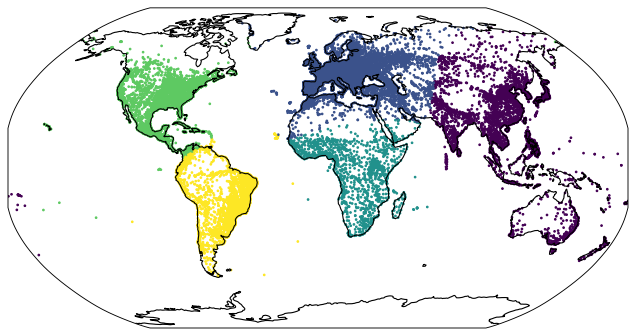

In [47]:
Ex2.plot_figure(df_5,"5_0123")